In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
# Open and read the .csv file
df_raw = pd.read_csv('../DB/household_data_60min_singleindex.csv')

# Datetime conversion
date_cols = ['utc_timestamp', 'cet_cest_timestamp']
df_raw[date_cols] = df_raw[date_cols].apply(pd.to_datetime, utc=True, errors='coerce')

# Divide the dataset into residential and industrial
industrial_cols = [col for col in df_raw.columns if 'industrial' in col]
residential_cols = [col for col in df_raw.columns if 'residential' in col]

# Grouping dataframes
industrial_groups = sorted(set([col.split('_')[2] for col in industrial_cols]))
residential_groups = sorted(set([col.split('_')[2] for col in residential_cols]))

df_industrial_groups = {group: df_raw[date_cols + [col for col in industrial_cols if group in col]] for group in industrial_groups}
df_residential_groups = {group: df_raw[date_cols + [col for col in residential_cols if group in col]] for group in residential_groups}

<Axes: xlabel='utc_timestamp'>

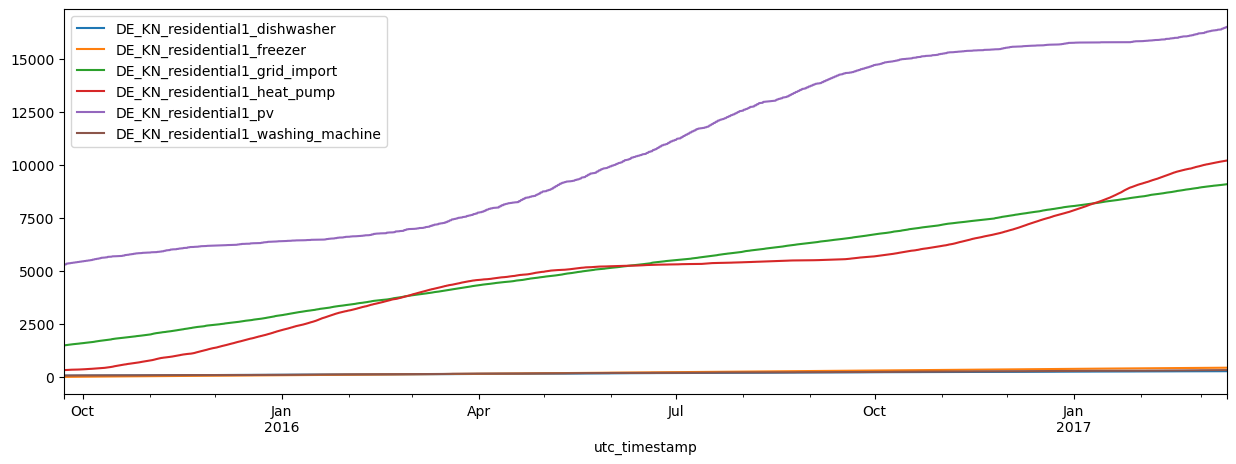

In [59]:
# Choose a dataframe to work with
df = df_residential_groups['residential1']

# Clean data: drop rows with NaN values
df = df.dropna()

# Plot the data
df.plot(x='utc_timestamp', y=df.columns[2:], figsize=(15, 5))

<Axes: xlabel='utc_timestamp'>

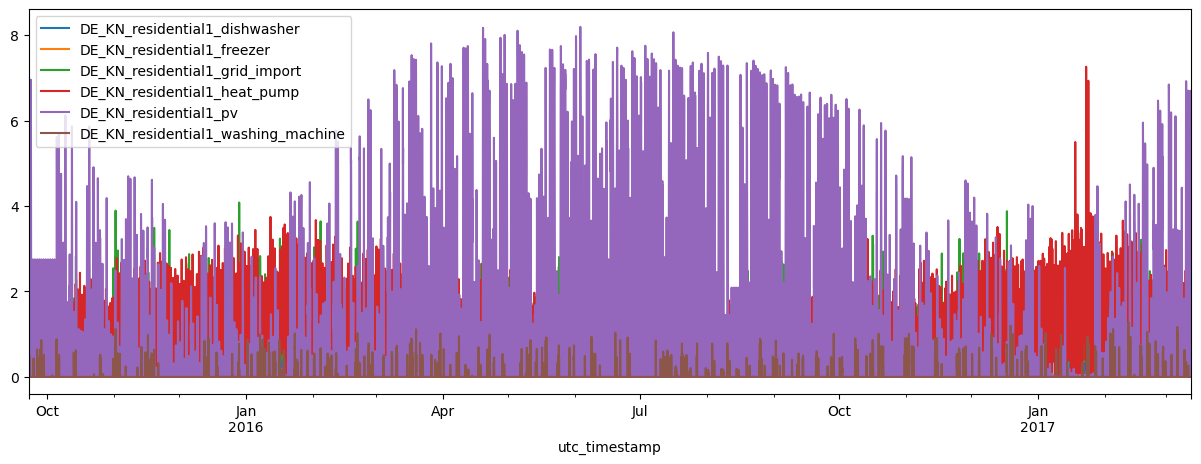

In [62]:
# Correct increasing data
def correct_increasing_data(dataframe, threshold=0.99):
    increasing_cols = []
    for col in dataframe.columns[2:]:
        # Check if the column is mostly increasing (abnormal behavior)
        if sum(x <= y for x, y in zip(dataframe[col], dataframe[col][1:])) / len(dataframe[col]) > threshold:
            increasing_cols.append(col)
    for col in increasing_cols:
        dataframe[col] = dataframe[col].diff().fillna(0)
    return dataframe, increasing_cols

# Plot the corrected data
df_corr, _ = correct_increasing_data(df)
df_corr.plot(x='utc_timestamp', y=df.columns[2:], figsize=(15, 5))

In [68]:
# Use plotly for better visualization and enable zooming on an external link
import plotly.express as px
fig = px.line(df_corr, x='utc_timestamp', y=df_corr.columns[2:])
fig.show(renderer="browser")  # Opens in the default web browser